In [5]:
# with Missing data
data2 <- read.csv("C:\\Users\\radha31\\Downloads\\Network_Intrusion1.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

str(data2)

'data.frame':	25192 obs. of  42 variables:
 $ duration                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ protocol_type              : chr  "tcp" "udp" "tcp" "tcp" ...
 $ service                    : chr  "ftp_data" "other" "private" "http" ...
 $ flag                       : chr  "SF" "SF" "S0" "SF" ...
 $ src_bytes                  : int  491 146 0 232 199 0 0 0 0 0 ...
 $ dst_bytes                  : int  0 0 0 8153 420 0 0 0 0 0 ...
 $ land                       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ wrong_fragment             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ urgent                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hot                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ num_failed_logins          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ logged_in                  : int  0 0 0 1 1 0 0 0 0 0 ...
 $ num_compromised            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ root_shell                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ su_attempted               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ num_ro

In [6]:
library(dplyr)
df1 <- mutate(data2, classnum = ifelse(class == "normal" ,0 ,
                                    ifelse(class == "anomaly" ,1 ,2                                  
                                                  )))
#head(df1)

df1 <- data.frame(df1$num_failed_logins, 
         df1$logged_in, 
         df1$classnum,
                  df1$count,
                  df1$srv_count
        )
head(df1)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



df1.num_failed_logins,df1.logged_in,df1.classnum,df1.count,df1.srv_count
0,0,0,2,2
0,0,0,13,1
0,0,1,123,6
0,1,0,5,5
0,1,0,30,32
0,0,1,121,19


In [10]:
library(randomForest)
set.seed(71) 
rf <-randomForest(df1.classnum ~.,data=df1, ntree=500) 
print(rf)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = df1.classnum ~ ., data = df1, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.08711826
                    % Var explained: 64.99


,IncNodePurity
df1.num_failed_logins,1.256287
df1.logged_in,1560.436578
df1.count,1340.666473
df1.srv_count,382.658621


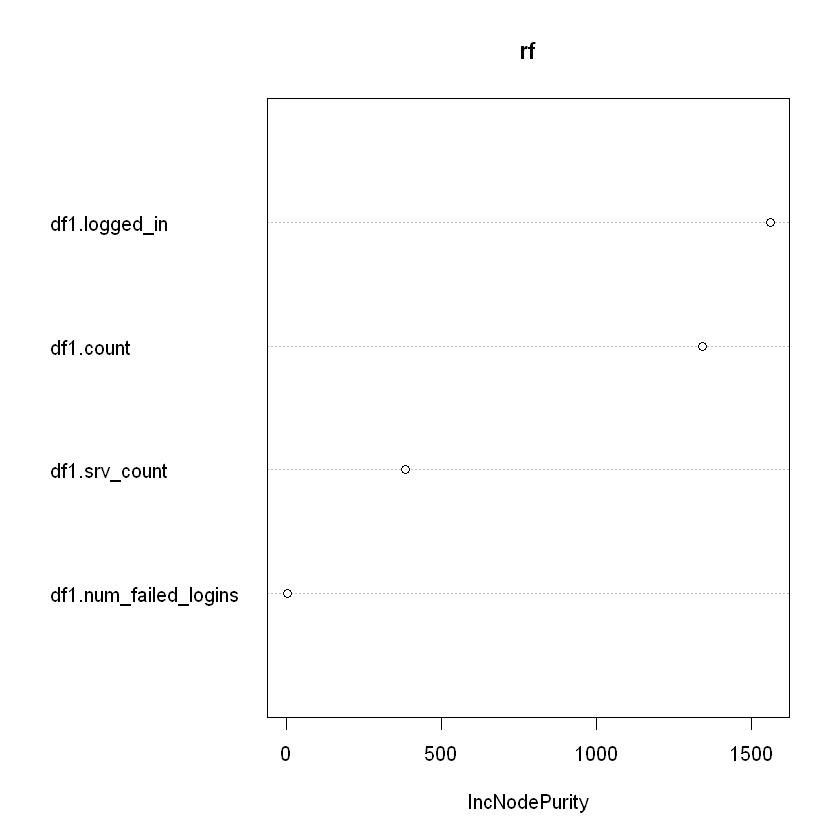

In [11]:
#Evaluate variable importance
importance(rf)
varImpPlot(rf)

duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,491,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
0,1,146,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
0,0,232,8153,0,0,0,0,0,1,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
0,0,199,420,0,0,0,0,0,1,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = class ~ ., data = df2, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 0.002027446
                    % Var explained: 99.19


[1] "SF"     "S0"     "REJ"    "RSTR"   "SH"     "RSTO"   "S1"     "RSTOS0"
 [9] "S3"     "S2"     "OTH"

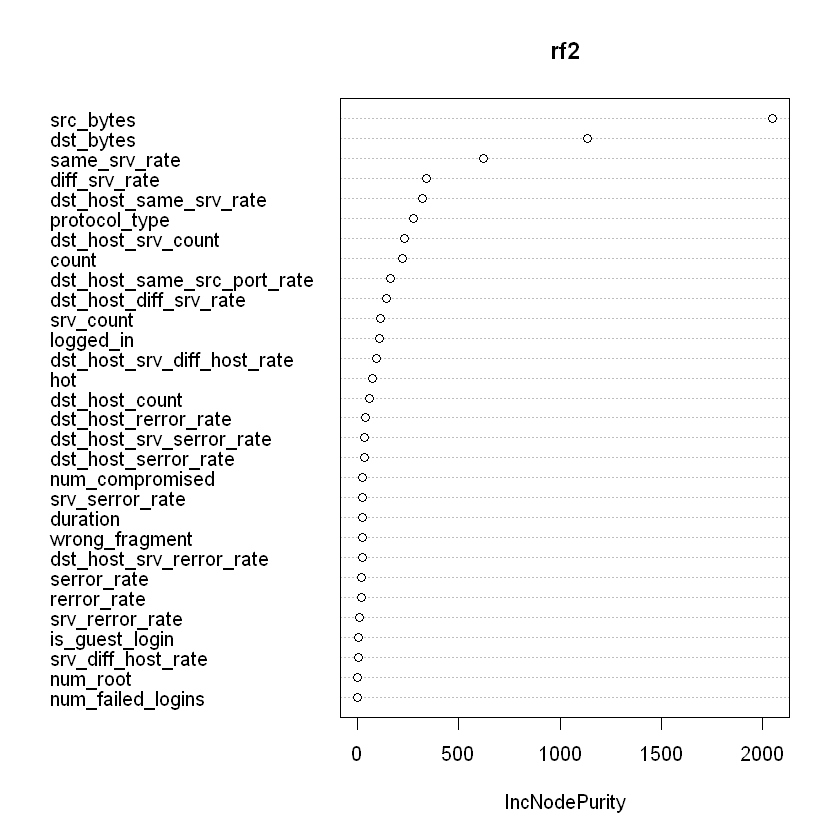

In [31]:
#library(dplyr)
df2 <- mutate(data2, class = ifelse(class == "normal" ,0 ,
                                    ifelse(class == "anomaly" ,1 ,2                                  
                                                  )))

#unique(data2$protocol_type)

df2 <- mutate(df2, protocol_type = ifelse(protocol_type == "tcp" ,0 ,
                                    ifelse(protocol_type == "udp" ,1 ,
                                           ifelse(protocol_type == "icmp" ,3,3
                                                  ))))
#head(df2)
#colnames(df2)

df2 <- df2[c(-3,-4)]

head(df2)
rf2 <-randomForest(class ~.,data=df2, ntree=500) 
print(rf2)
varImpPlot(rf2)

unique(data2$flag)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

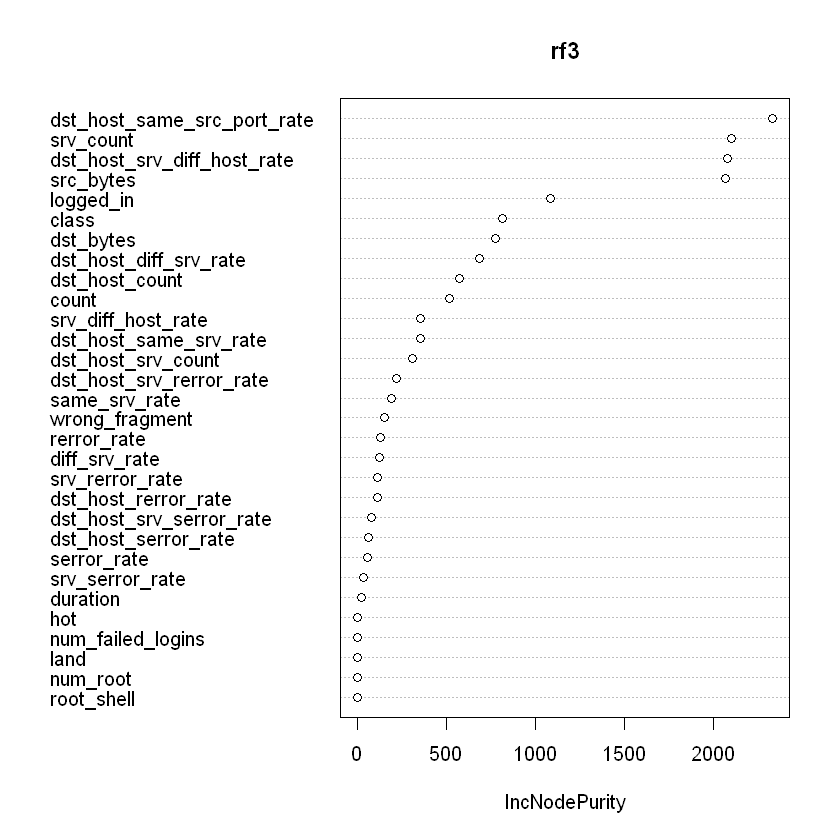

In [32]:
rf3 <-randomForest(protocol_type ~.,data=df2, ntree=500) 
#print(rf3)
varImpPlot(rf3)

